In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [37]:
class Perceptron:
    def __init__(self, inputs_n, activation_funct):
        self.inputs_n = inputs_n
        self.activation_funct = activation_funct
        self.weight = np.random.rand(inputs_n)
        self.intercept = np.random.rand()

    def activation(self, x):
        if self.activation_funct == 'step':
            return  1 if x>= 0 else 0

        elif self.activation_funct == 'sigmoid':
            return 1/(np.exp(-x) + 1)

        elif self.activation_funct == 'relu':
            return max(0, x)

        else:
            'put something on bruh.'

    def forward(self, inpt):
        weight_sum = np.dot(inpt, self.weight) + self.intercept
        outpt = self.activation(weight_sum)
        return outpt

class PerceptronBackward:
    def __init__(self, input_size, eta0 = 1e-2, epochs = 100, activation_funct = 'step'):
        self.input_size = input_size
        self.eta0 = eta0
        self.epochs = epochs
        self.activation_funct = activation_funct
        self.weight = np.zeros(input_size + 1)

    def activation(self, x):
        if self.activation_funct == 'step':
            return  1 if x>= 0 else 0

        elif self.activation_funct == 'sigmoid':
            return 1/(np.exp(-x) + 1)

        elif self.activation_funct == 'relu':
            return max(0, x)

        else:
            'put something on bruh.'

    def fit(self, x, y):
        m, n = x.shape
        x_b  = np.c_[x, np.ones(m)]
        for epoch in range(self.epochs):
            for xi, target in zip(x_b, y):
                prediction = self.activation(np.dot(xi, self.weight))
                update = self.eta0*(target-prediction)
                self.weight += update * xi

    def predict(self, x):
        m, n = x.shape
        x_b = np.c_[x, np.ones(m)]
        weight_sum = np.dot(x_b, self.weight)
        return np.array([self.activation(x) for x in weight_sum])

    def evaluate(self, x, y):
        prediction = self.predict(x)
        return np.mean(prediction == y)
        

In [ ]:
inputs_n = 2
activation_funct = 'sigmoid'
perceptron = Perceptron(inputs_n, activation_funct)

In [ ]:
inpt = np.array([0.1, 0.2])
outpt = perceptron.forward(inpt)

In [ ]:
outpt

In [48]:
x = np.array([[0, 1, 3, 2, 3], [1, 2, 5, 2, 5]])
m, n = x.shape
# np.c_[x, np.ones(m)]
x

array([[0, 1, 3, 2, 3],
       [1, 2, 5, 2, 5]])

In [7]:
x = np.array([[0, 1, 3, 2, 3], [1, 2, 5, 2, 5]])
m, n = x.shape
np.c_[x, np.ones(m)]
x

array([[0, 1, 3, 2, 3],
       [1, 2, 5, 2, 5]])

In [8]:
x = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([0, 0, 0, 1])

In [9]:
per_back = PerceptronBackward(input_size = 2, eta0 = 0.1, epochs = 10)
per_back.fit(x, y)
print(f'La precisión del modelo es {per_back.evaluate(x, y)}')
print(f'La predicciones son {per_back.predict(x)}')

La precisión del modelo es 1.0
La predicciones son [0 0 0 1]


In [47]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

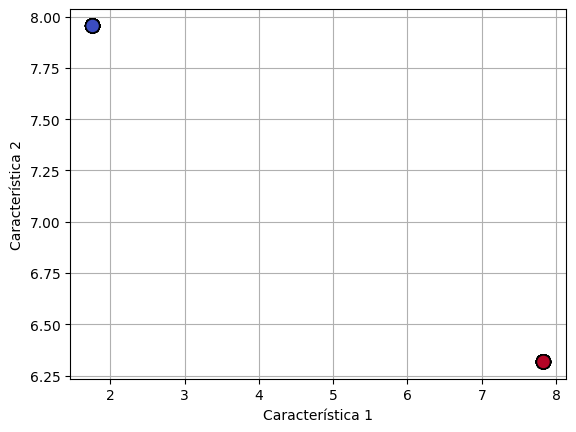

In [86]:
x, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=20, cluster_std=0)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)

plt.scatter(x[:, 0], x[:, 1], c=y, s=100, cmap='coolwarm', edgecolors='k', zorder=3)
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.grid(zorder=1)
plt.show()

In [87]:
perceptron = PerceptronBackward(input_size=2, epochs=20)
perceptron.fit(x_train,y_train)
perceptron.evaluate(x_train, y_train)

np.float64(1.0)

In [88]:
y_pred = perceptron.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0])

In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

